<a href="https://colab.research.google.com/github/ClaudioAMF1/Machine-Learning/blob/main/ML_Atividade03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
from sklearn.ensemble import IsolationForest, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Carregando o Dataset
url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/main/california/california_housing.csv'
df = pd.read_csv(url, delimiter = ',', decimal = '.')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Verificando a estrutura de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Calculando as correlações entre as variáveis ​​preditoras e a variável alvo
correlations = df.corr()['MedHouseVal'].sort_values(ascending=False)
print(correlations)

MedHouseVal       1.000000
MedInc            0.688075
AveRooms          0.151948
HouseAge          0.105623
AveOccup         -0.023737
Population       -0.024650
DistanceFromSF   -0.040932
Longitude        -0.045967
AveBedrms        -0.046701
Latitude         -0.144160
Name: MedHouseVal, dtype: float64


In [ ]:
# Verificando a distribuição dos dados
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Professor - Distância para San Francisco
df['DistanceFromSF'] = np.sqrt((df['Latitude'] - 37.7749)**2 + (df['Longitude'] + 122.4194)**2)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,DistanceFromSF
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.216606
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.216800
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.194485
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.185301
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.185301


In [ ]:
# retirar os outliers
# plotar o gráfico do cotovelo
# Usar o kmean em função da latitude e longitude (criando a coluna Geocluster para armazenar os resultados)
# Ver a matriz de correlação

In [ ]:
#Contagem de números entre 0 e 1

print("Contagem de valores entre 0 e 1 em cada coluna:")
for column in df.columns:
    count_decimais = ((df[column] > 0) & (df[column] < 1)).sum()
    print(f"{column}: {count_decimais}")

Contagem de valores entre 0 e 1 em cada coluna:
MedInc: 155
HouseAge: 0
AveRooms: 2
AveBedrms: 4395
Population: 0
AveOccup: 3
Latitude: 0
Longitude: 0
MedHouseVal: 3596


In [ ]:
for col in ['AveRooms', 'AveBedrms']:
  df.loc[(df[col] > 0) & (df[col] < 1), col] = 1

In [ ]:
#FEITO
#Contagem de números entre 0 e 1

print("Contagem de valores iguais a 5 em MedHouseVal:")
for column in df.columns:
    count_cinco = ((df[column] >= 5)).sum()
    print(f"{column}: {count_cinco}")

Contagem de valores iguais a 5 em MedHouseVal:
MedInc: 4509
HouseAge: 20325
AveRooms: 11937
AveBedrms: 45
Population: 20639
AveOccup: 346
Latitude: 20640
Longitude: 0
MedHouseVal: 992


In [ ]:
df['MedHouseVal'][df['MedHouseVal'] >= 5] = np.nan

In [ ]:
df = df.dropna()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000
mean,3.676411,28.373066,5.361722,1.106176,1441.368485,3.096560,35.651872,-119.562378,1.920553
std,1.570602,12.504050,2.293295,0.448920,1144.075196,10.639195,2.150066,2.005760,0.971109
min,0.499900,1.000000,1.000000,1.000000,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.526300,18.000000,4.416667,1.005882,796.000000,2.446614,33.930000,-121.760000,1.164750
50%,3.449050,28.000000,5.185730,1.048576,1179.000000,2.837779,34.270000,-118.500000,1.736000
75%,4.582500,37.000000,5.971083,1.099222,1746.250000,3.306021,37.730000,-117.990000,2.479000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,4.991000


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,1.000000,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# FEITO
# Indentificando os valores negativos na tabela

print("Contagem de valores Negativos em cada coluna:")
for column in df.columns:
    count_negative = (df[column] < 0).sum()
    print(f"{column}: {count_negative}")

Contagem de valores Negativos em cada coluna:
MedInc: 0
HouseAge: 0
AveRooms: 0
AveBedrms: 0
Population: 0
AveOccup: 0
Latitude: 0
Longitude: 19648
MedHouseVal: 0


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,1.000000,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Hipótese 2: Como ainda teremos em torno de 7000 observações na amostra após remover os dados ausentes, decidimos removê-los para assegurar maior fidelidade.
df = df.dropna()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000
mean,3.676411,28.373066,5.361722,1.106176,1441.368485,3.096560,35.651872,-119.562378,1.920553
std,1.570602,12.504050,2.293295,0.448920,1144.075196,10.639195,2.150066,2.005760,0.971109
min,0.499900,1.000000,1.000000,1.000000,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.526300,18.000000,4.416667,1.005882,796.000000,2.446614,33.930000,-121.760000,1.164750
50%,3.449050,28.000000,5.185730,1.048576,1179.000000,2.837779,34.270000,-118.500000,1.736000
75%,4.582500,37.000000,5.971083,1.099222,1746.250000,3.306021,37.730000,-117.990000,2.479000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,4.991000


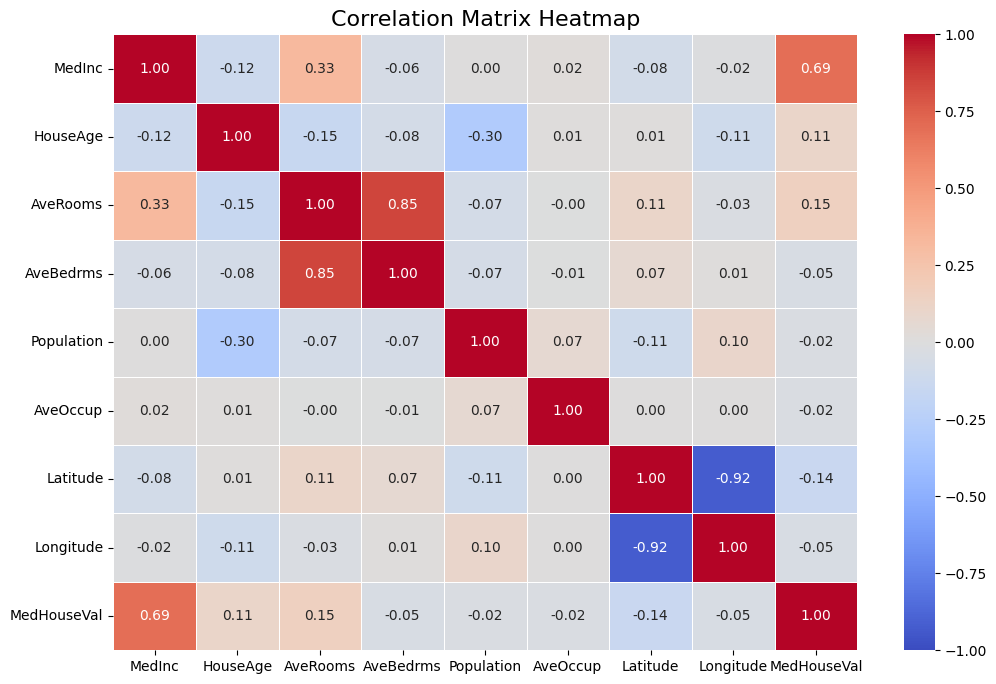

In [ ]:
# As distribuições parecem melhores agora. Vamos exibir a nova matriz de correlação para análise.

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin = -1)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,1.000000,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Calculando as correlações entre as variáveis ​​preditoras e a variável alvo
correlations = df.corr()['MedHouseVal'].sort_values(ascending=False)
print(correlations)

MedHouseVal    1.000000
MedInc         0.647471
AveRooms       0.200178
HouseAge       0.065277
Population     0.012300
Longitude     -0.046125
AveOccup      -0.053534
AveBedrms     -0.109445
Latitude      -0.148500
Name: MedHouseVal, dtype: float64


In [ ]:
# Preparando as variáveis para treinar o modelo.
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinar com o ExtraTrees
#model = ExtraTreesRegressor(random_state=7, n_estimators=67, max_features='sqrt', max_depth=100, min_samples_split=13, min_samples_leaf=1, bootstrap = False)
#model = ExtraTreesRegressor(random_state=42, n_estimators=350, max_features='sqrt', max_depth=None, min_samples_split=2, min_samples_leaf=1)
model = ExtraTreesRegressor();
model.fit(X_train, y_train)

ExtraTreesRegressor()

In [ ]:
# Fazer testes com RandomForest
# Fazer testes com LightGBM
# Fazer testes com XGBoost

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Fazer previsões
y_pred = model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.32323005891472883
Mean Squared Error (MSE): 0.25057051634688154
Root Mean Squared Error (RMSE): 0.500570191228844
R² Score: 0.8087844936141625


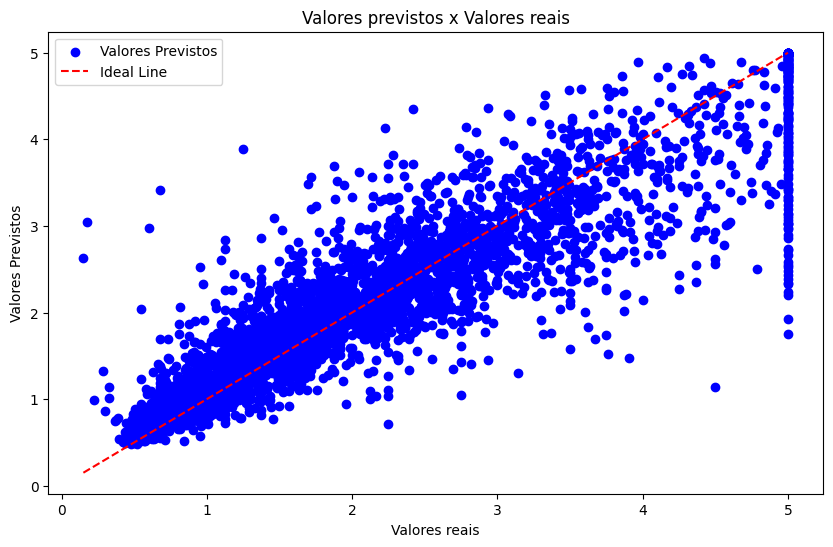

In [ ]:
# Gráfico de valores previstos x valores atuais
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=y_pred, color='blue', label='Valores Previstos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.title('Valores previstos x Valores reais')
plt.legend()
plt.show()
# O gráfico terá dados lineares no valor 5 por limitação do DataSet, uma vez que todas as casas que ultrapassam o valor de 500.000 são arredondadas para 5.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Passo 1: Definir o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],     # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],     # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],     # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]        # Número mínimo de amostras em um nó folha
}

# Passo 2: Configurar o GridSearchCV
grid_search = GridSearchCV(
    estimator=ExtraTreesRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,                      # Número de folds para validação cruzada
    scoring='neg_mean_squared_error',  # Métrica de avaliação
    verbose=1,                 # Nível de verbosidade
    n_jobs=-1                  # Usar todos os processadores disponíveis
)

# Passo 3: Treinar o GridSearchCV
grid_search.fit(X_train, y_train)

# Passo 4: Avaliar o melhor modelo
best_model = grid_search.best_estimator_
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)

# Fazer previsões e calcular métricas
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores hiperparâmetros encontrados: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Absolute Error (MAE): 0.3252592332055371
Mean Squared Error (MSE): 0.2524304082310781
Root Mean Squared Error (RMSE): 0.5024245298859105
R² Score: 0.8073651719252244


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Passo 1: Definir o espaço de busca dos hiperparâmetros
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]  # Usar ou não amostragem com reposição
}

# Passo 2: Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ExtraTreesRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # Número de combinações de hiperparâmetros para amostrar
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Passo 3: Treinar o RandomizedSearchCV
random_search.fit(X_train, y_train)

# Passo 4: Avaliar o melhor modelo
best_model = random_search.best_estimator_
print("Melhores hiperparâmetros encontrados:", random_search.best_params_)

# Fazer previsões e calcular métricas
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores hiperparâmetros encontrados: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Mean Absolute Error (MAE): 0.3272080146896544
Mean Squared Error (MSE): 0.25486343985866594
Root Mean Squared Error (RMSE): 0.5048400141219651
R² Score: 0.8055084755289177
